In [256]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import re

# input file path
file_path = '3D_Printed_Runaway.csv'

# cleaned output file path getting rid of the strange header
cleaned_path = file_path.replace('.csv', '_cleaned.csv')

# frequency of BetaFlight Logging in Hz
# Default on Dylan that I setup is 1600Hz
log_freq = 1600

# specify what to insert at the start of every graph
# title_parts = re.split(r'(\d+)', file_path.split('.')[0])
# title_prefix = ' '.join(title_parts)

title_prefix = '3D Printed Frame: '

plot_width = 10
plot_height = 4


In [257]:
# Find the line index where "loopIteration" appears
with open(file_path, 'r') as infile:
    lines = infile.readlines()
    for index, line in enumerate(lines):
        if 'loopIteration' in line:
            start_index = index
            break

# Write the remaining lines to a new file
with open(cleaned_path, 'w') as outfile:
    outfile.writelines(lines[start_index:])

# Create the dataframe from the new file
df = pd.read_csv(cleaned_path)

# Insert a time in seconds column
df.insert(1, 'time_sec', df.index * (1/1600))

df

,loopIteration,time_sec,time,axisP[0],axisP[1],axisP[2],axisI[0],axisI[1],axisI[2],axisD[0],...,rcCommands[1],rcCommands[2],rcCommands[3],axisError[0],axisError[1],axisError[2],motorLegacy[0],motorLegacy[1],motorLegacy[2],motorLegacy[3]
0,0,0.000000,34696670,15,-4,0,0,0,0,0,...,-4,0,0.0,15,-4,0,158,175,217,232
1,2,0.000625,34697288,16,-4,0,0,0,0,2,...,-4,0,0.0,15,-4,0,158,172,223,237
2,4,0.001250,34697906,16,-4,0,0,0,0,3,...,-4,0,0.0,16,-4,0,158,170,229,240
3,6,0.001875,34698523,16,-3,0,0,0,0,4,...,-4,0,0.0,16,-4,0,158,167,233,241
4,8,0.002500,34699140,16,-3,0,0,0,0,4,...,-4,0,0.0,16,-4,0,158,165,235,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,14372,4.491250,39133653,-30,128,0,0,0,0,-22,...,51,-7,0.0,-25,100,-2,2047,383,1915,158
7187,14374,4.491875,39134268,-43,10,-1,0,0,0,-66,...,52,-8,0.0,-35,9,-1,1001,636,656,158
7188,14376,4.492500,39134884,-46,-100,0,0,0,0,-87,...,52,-8,0.0,-38,-79,2,549,2047,158,1527
7189,14378,4.493125,39135503,-42,-171,2,0,0,0,-84,...,51,-8,0.0,-34,-137,7,483,2047,158,1611


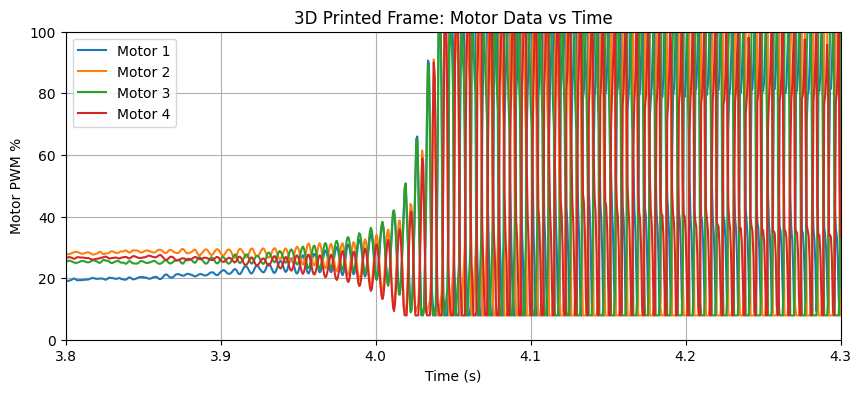

In [258]:
# Plotting
plt.figure(figsize=(plot_width, plot_height))  # Adjust figure size as needed

# Plot each motor data against time
for i in range(4):  # Assuming you have 4 motors
    plt.plot(df['time_sec'], df[f'motor[{i}]'] / 20, label=f'Motor {i + 1}')

# Set labels and title
plt.xlabel('Time (s)')
plt.ylabel('Motor PWM %')
plt.title(title_prefix + 'Motor Data vs Time')

plt.xlim(3.8, 4.3)
plt.ylim(0, 100)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


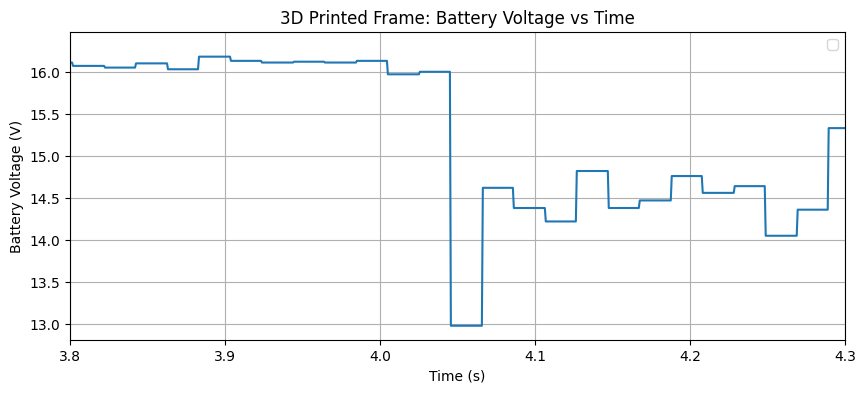

In [259]:
# Plotting
plt.figure(figsize=(plot_width, plot_height))  # Adjust figure size as needed

# Plot each motor data against time
plt.plot(df['time_sec'], df['vbatLatest'] / 100)

# Set labels and title
plt.xlabel('Time (s)')
plt.ylabel('Battery Voltage (V)')
plt.title(title_prefix + 'Battery Voltage vs Time')

# Add legend
plt.legend()

plt.xlim(3.8, 4.3)
#plt.ylim(14.75, 16.20)

# Show plot
plt.grid(True)
plt.show()

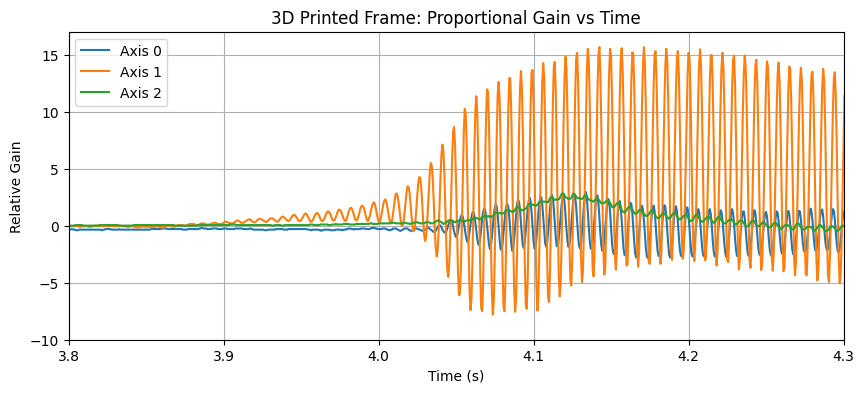

In [260]:
# Plotting
plt.figure(figsize=(plot_width, plot_height))  # Adjust figure size as needed

# Plot each motor data against time
# plt.plot(df['time_sec'], df['amperageLatest'] / 100)

# Plot each motor data against time
for i in range(3):  # Assuming you have 4 motors
    plt.plot(df['time_sec'], df[f'axisP[{i}]'] / 20, label=f'Axis {i}')

# Set labels and title
plt.xlabel('Time (s)')
plt.ylabel('Relative Gain')
plt.title(title_prefix + 'Proportional Gain vs Time')

# Add legend
plt.legend()

plt.xlim(3.8, 4.3)
plt.ylim(-10, 17)

# Show plot
plt.grid(True)
plt.show()

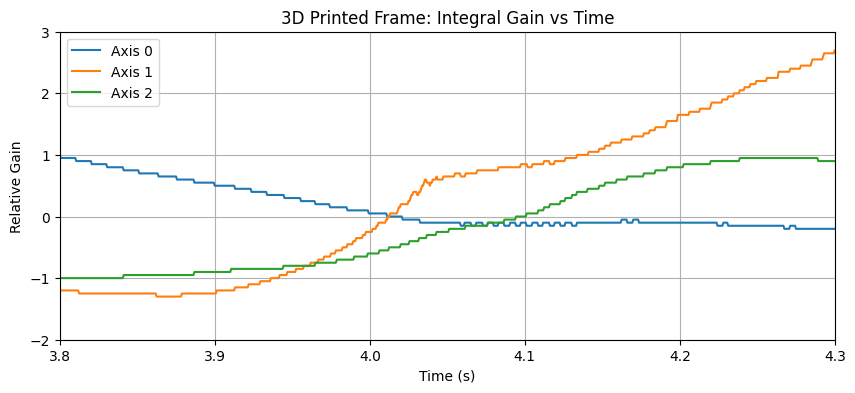

In [261]:
# Plotting
plt.figure(figsize=(plot_width, plot_height))  # Adjust figure size as needed

# Plot each motor data against time
# plt.plot(df['time_sec'], df['amperageLatest'] / 100)

# Plot each motor data against time
for i in range(3):  # Assuming you have 4 motors
    plt.plot(df['time_sec'], df[f'axisI[{i}]'] / 20, label=f'Axis {i}')

# Set labels and title
plt.xlabel('Time (s)')
plt.ylabel('Relative Gain')
plt.title(title_prefix + 'Integral Gain vs Time')

# Add legend
plt.legend()

plt.xlim(3.8, 4.3)
plt.ylim(-2, 3)

# Show plot
plt.grid(True)
plt.show()

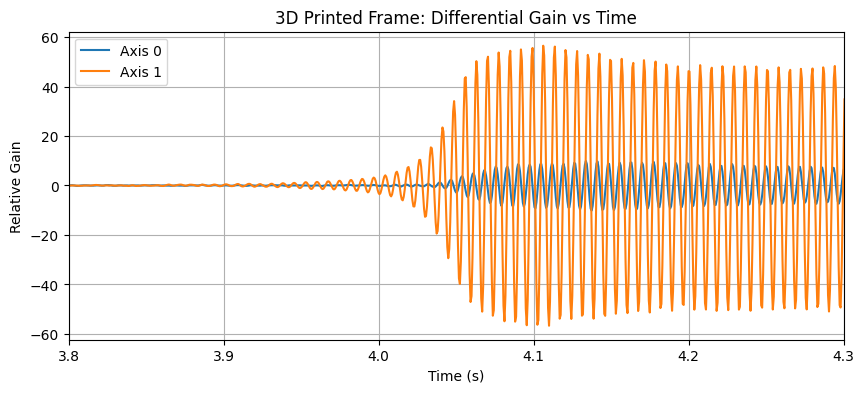

In [262]:
# Plotting
plt.figure(figsize=(plot_width, plot_height))  # Adjust figure size as needed

# Plot each motor data against time
# plt.plot(df['time_sec'], df['amperageLatest'] / 100)

# Plot each motor data against time
for i in range(2):  # Assuming you have 4 motors
    plt.plot(df['time_sec'], df[f'axisD[{i}]'] / 20, label=f'Axis {i}')

# Set labels and title
plt.xlabel('Time (s)')
plt.ylabel('Relative Gain')
plt.title(title_prefix + 'Differential Gain vs Time')

# Add legend
plt.legend()

plt.xlim(3.8, 4.3)
#plt.ylim(-2, 3)

# Show plot
plt.grid(True)
plt.show()

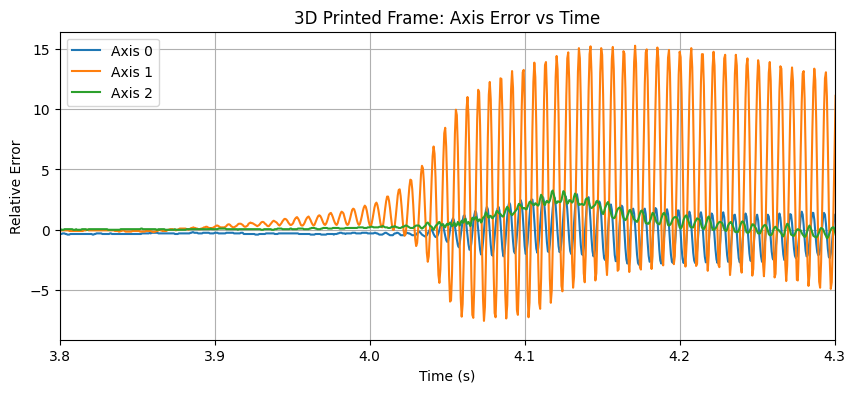

In [263]:
# Plotting
plt.figure(figsize=(plot_width, plot_height))  # Adjust figure size as needed

# Plot each motor data against time
# plt.plot(df['time_sec'], df['amperageLatest'] / 100)

# Plot each motor data against time
for i in range(3):  # Assuming you have 4 motors
    plt.plot(df['time_sec'], df[f'axisError[{i}]'] / 20, label=f'Axis {i}')

# Set labels and title
plt.xlabel('Time (s)')
plt.ylabel('Relative Error')
plt.title(title_prefix + 'Axis Error vs Time')

# Add legend
plt.legend()

plt.xlim(3.8, 4.3)
#plt.ylim(-2, 3)

# Show plot
plt.grid(True)
plt.show()